In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=1

## Ligne Influence Effort Tranchant E
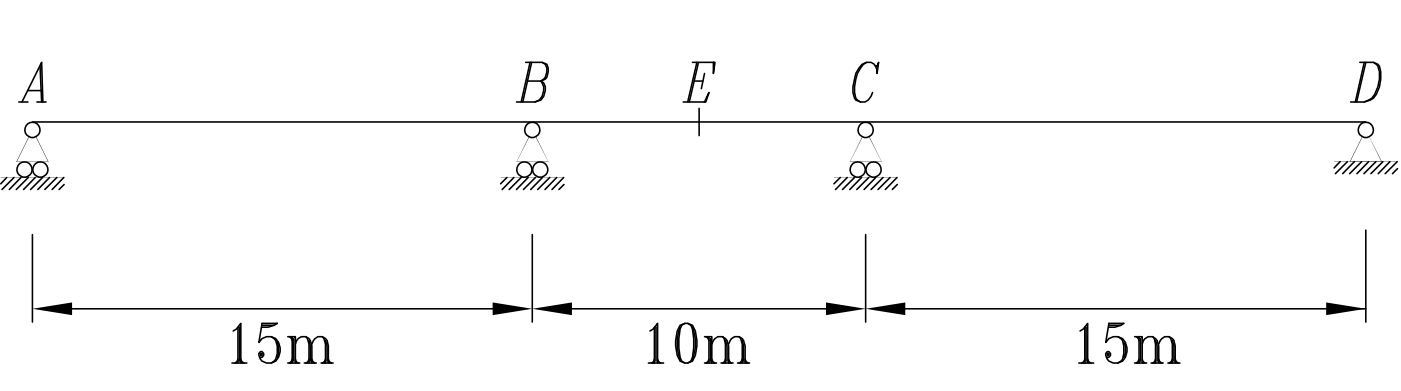

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 0],
     [10,0],
     [11, 0],
     [12, 0],
     [13, 0],
     [14, 0],
     [15, 0], # Appui B
     [16, 0],
     [17, 0],
     [18, 0],
     [19, 0],
     [20,0], # Point E
     [20,0], # Point E (Dupliqué)
     [21,0],
     [22,0],
     [23,0],
     [24,0],
     [25,0], # Appui C
     [26,0],
     [27,0],
     [28,0],
     [29,0],
     [30,0],
     [31,0],
     [32,0],
     [33,0],
     [34,0],
     [35,0],
     [36,0],
     [37,0],
     [38,0],
     [39,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1

print(mat_elem_local_1)

[[  1.   0.   0.  -1.   0.   0.]
 [  0.  12.   6.   0. -12.   6.]
 [  0.   6.   4.   0.  -6.   2.]
 [ -1.   0.   0.   1.   0.   0.]
 [  0. -12.  -6.   0.  12.  -6.]
 [  0.   6.   2.   0.  -6.   4.]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1


In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1


In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
# Travée 1
LM = np.zeros((6, 41), dtype=int)
LM[:,0] = [0, 0, 39, 0, 1, 40]
LM[:,1] = [0, 1, 40, 0, 2, 41]    
LM[:,2] = [0, 2, 41, 0, 3, 42]   
LM[:,3] = [0, 3, 42, 0, 4, 43]
LM[:,4] = [0, 4, 43, 0, 5, 44]   
LM[:,5] = [0, 5, 44, 0, 6, 45]
LM[:,6] = [0, 6, 45, 0, 7, 46]
LM[:,7] = [0, 7, 46, 0, 8, 47]
LM[:,8] = [0, 8, 47, 0, 9, 48]
LM[:,9] = [0, 9, 48, 0, 10, 49]
LM[:,10] = [0, 10, 49, 0, 11, 50]
LM[:,11] = [0, 11, 50, 0, 12, 51]
LM[:,12] = [0, 12, 51, 0, 13, 52]
LM[:,13] = [0, 13, 52, 0, 14, 53]
LM[:,14] = [0, 14, 53, 0, 0, 54]

#Travée 2
LM[:,15] = [0, 0,  54, 0, 15, 55]
LM[:,16] = [0, 15, 55, 0, 16, 56]
LM[:,17] = [0, 16, 56, 0, 17, 57]
LM[:,18] = [0, 17, 57, 0, 18, 58]
LM[:,19] = [0, 18, 58, 0, 19, 59]
#Les degré de liberté en déplacement sont différents 
LM[:,20] = [0, 20, 59, 0, 21, 60]
LM[:,21] = [0, 21, 60, 0, 22, 61]
LM[:,22] = [0, 22, 61, 0, 23, 62]
LM[:,23] = [0, 23, 62, 0, 24, 63]
LM[:,24] = [0, 24, 63, 0, 0, 64]

#Travée 3
LM[:,25] = [0, 0, 64, 0, 25, 65]
LM[:,26] = [0, 25,65, 0, 26, 66]
LM[:,27] = [0, 26,66, 0, 27, 67]
LM[:,28] = [0, 27,67, 0, 28, 68]
LM[:,29] = [0, 28,68, 0, 29, 69]
LM[:,30] = [0, 29,69, 0, 30, 70]
LM[:,31] = [0, 30,70, 0, 31, 71]
LM[:,32] = [0, 31,71, 0, 32, 72]
LM[:,33] = [0, 32,72, 0, 33, 73]
LM[:,34] = [0, 33,73, 0, 34, 74]
LM[:,35] = [0, 34,74, 0, 35, 75]
LM[:,36] = [0, 35,75, 0, 36, 76]
LM[:,37] = [0, 36,76, 0, 37, 77]
LM[:,38] = [0, 37,77, 0, 38, 78]
LM[:,39] = [0, 38,78, 0, 0,  79]

print(LM)


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 20 21 22 23
  24  0 25 26 27 28 29 30 31 32 33 34 35 36 37 38  0]
 [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
  63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14  0 15 16 17 18 19 21 22 23 24
   0 25 26 27 28 29 30 31 32 33 34 35 36 37 38  0  0]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
  64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79  0]]


In [8]:
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((79, 79), dtype=np.float32)

for i in range(40):
    K_global_2 = assemblage_matrice_rigidite(LM, i, K_global_2, mat_elem_global_1)

print(K_global_2.shape)
np.linalg.inv(K_global_2)

(79, 79)


array([[ 4.0458274 ,  7.333284  ,  9.770667  , ...,  0.29451853,
         0.30696297,  0.31111112],
       [ 7.333284  , 13.816272  , 18.765333  , ...,  0.58114815,
         0.6057037 ,  0.61388886],
       [ 9.770667  , 18.765333  , 26.208     , ...,  0.852     ,
         0.888     ,  0.9       ],
       ...,
       [ 0.29451853,  0.58114815,  0.852     , ...,  2.9866111 ,
         2.8747778 ,  2.8375    ],
       [ 0.30696297,  0.6057037 ,  0.888     , ...,  2.8747778 ,
         3.7624445 ,  3.725     ],
       [ 0.31111112,  0.61388886,  0.9       , ...,  2.8375    ,
         3.725     ,  4.6875    ]], dtype=float32)

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(79)
P_global[18] = -1
P_global[19] = 1
print(P_global)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U)

[  12.44444444   24.55555556   36.           46.44444444   55.55555556
   63.           68.44444444   71.55555556   72.           69.44444444
   63.55555556   54.           40.44444444   22.55555556  -27.33333333
  -58.66666667  -93.         -129.33333333 -166.66666667  166.66666667
  129.33333333   93.           58.66666667   27.33333333  -22.55555556
  -40.44444444  -54.          -63.55555556  -69.44444444  -72.
  -71.55555556  -68.44444444  -63.          -55.55555556  -46.44444444
  -36.          -24.55555556  -12.44444444   12.5          12.33333333
   11.83333333   11.            9.83333333    8.33333333    6.5
    4.33333333    1.83333333   -1.           -4.16666667   -7.66666667
  -11.5         -15.66666667  -20.16666667  -25.          -29.5
  -33.          -35.5         -37.          -37.5         -37.
  -35.5         -33.          -29.5         -25.          -20.16666667
  -15.66666667  -11.5          -7.66666667   -4.16666667   -1.
    1.83333333    4.33333333    6.5         

In [11]:
# Line d'Influence Muller-Breslaut
V1 = U[18]
V2 = U[19]


LI  = U/(abs(V1) + abs(V2)) #changer le signe de V2 pour une somme en valeur absolue
print(LI)


[ 0.03733333  0.07366667  0.108       0.13933333  0.16666667  0.189
  0.20533333  0.21466667  0.216       0.20833333  0.19066667  0.162
  0.12133333  0.06766667 -0.082      -0.176      -0.279      -0.388
 -0.5         0.5         0.388       0.279       0.176       0.082
 -0.06766667 -0.12133333 -0.162      -0.19066667 -0.20833333 -0.216
 -0.21466667 -0.20533333 -0.189      -0.16666667 -0.13933333 -0.108
 -0.07366667 -0.03733333  0.0375      0.037       0.0355      0.033
  0.0295      0.025       0.0195      0.013       0.0055     -0.003
 -0.0125     -0.023      -0.0345     -0.047      -0.0605     -0.075
 -0.0885     -0.099      -0.1065     -0.111      -0.1125     -0.111
 -0.1065     -0.099      -0.0885     -0.075      -0.0605     -0.047
 -0.0345     -0.023      -0.0125     -0.003       0.0055      0.013
  0.0195      0.025       0.0295      0.033       0.0355      0.037
  0.0375    ]


Ordonnée de la Ligne d'Influence : 
 [ 0.          0.03733333  0.07366667  0.108       0.13933333  0.16666667
  0.189       0.20533333  0.21466667  0.216       0.20833333  0.19066667
  0.162       0.12133333  0.06766667  0.         -0.082      -0.176
 -0.279      -0.388      -0.5         0.5         0.388       0.279
  0.176       0.082       0.         -0.06766667 -0.12133333 -0.162
 -0.19066667 -0.20833333 -0.216      -0.21466667 -0.20533333 -0.189
 -0.16666667 -0.13933333 -0.108      -0.07366667 -0.03733333  0.        ]


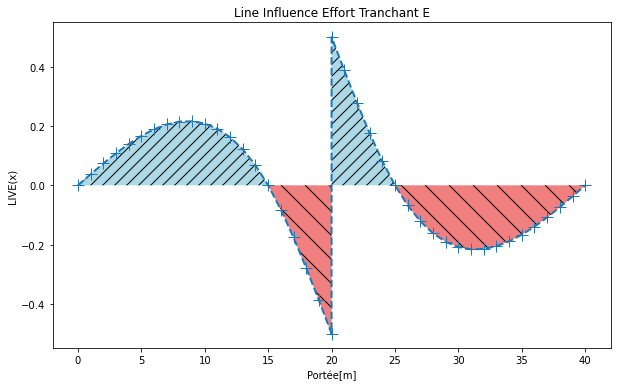

In [12]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]

y = np.zeros((42,))
# Noeud 0
y[0]   = 0
# Noeud 1, 2
y[1:15] = LI[0:14] #(0, 1)
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[15]   = 0 
# Noeud 4,5 : Point E
y[16:26] = LI[14:24] #(2, 3)
y[26] = 0
# Noeud 5, 6
y[27:41] = LI[24:38] #(4, 5)
# Noeud 7 reaction appui 0
y[41] = 0

print("Ordonnée de la Ligne d'Influence : \n",y)

plt.figure(figsize=(10,6))
plt.plot(x, y, '+--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIVE(x)")
plt.title("Line Influence Effort Tranchant E")

# Show the plot
plt.show()

np.savetxt('./resultats/LIVE_resultats.csv', y, delimiter=',', fmt='%s')